## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
import xgboost as xgb

# set custom pd settings
pd.set_option('display.max_columns', None)

## Import train and test sets

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,29,0.733,0.921,0.875,0.914,0.509,0.868,0.801,0.996,59,30,0.629,0.678,0.686,82,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159,7,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [4]:
X_test.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,52,0.552,0.897,0.867,0.998,0.877,0.771,0.712,0.649,38,-14,0.747,0.728,0.985,181,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,24,0.803,0.910,0.604,0.804,0.735,0.626,0.844,0.693,59,35,0.629,0.678,0.686,185,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,37,0.846,0.838,0.721,0.610,0.999,0.736,0.840,0.898,62,25,0.590,0.745,0.667,139,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
3,36,0.828,0.663,0.986,0.834,0.761,0.639,0.615,0.623,38,2,0.747,0.728,0.985,196,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4,41,0.753,0.864,0.870,0.450,0.791,0.542,0.948,0.854,25,-16,0.871,0.786,0.771,208,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


## Preprocessing: Random Oversampling of Minority Class (test set only)

In [5]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")

# oversample train splits using imbalanced-learn
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# # Summarize class distribution
# print(Counter(y_train))
# print(Counter(y_train_over))

In [6]:
# Count of oversampled y-training set
print("Oversampled y_train set")
print(y_train_over['Resigned'].value_counts())

# Count of original y_training set
print("Original y-train set")
print(y_train['Resigned'].value_counts())

Oversampled y_train set
0    287742
1    287742
Name: Resigned, dtype: int64
Original y-train set
0    287742
1        51
Name: Resigned, dtype: int64


## Preprocessing: Drop Outliers before Scaling

In [7]:
# Get numeric features
num_features = X_train.select_dtypes(include=['number'], exclude=['datetime']).columns.to_list()
num_features = num_features[:16]

### Check and Remove Outliers

In [8]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [9]:
# Finds the number of outliers in each col
outliers = {}
for col in X_train[num_features]:
    outlier = find_outliers_IQR(X_train[col])
    outliers[col] = len(outlier)
outliers

{'sub_age': 0,
 'sub_health_h': 3020,
 'sub_commitment_h': 2329,
 'sub_perceptiveness_h': 1700,
 'sub_dexterity_h': 1310,
 'sub_sociality_h': 3422,
 'sub_goodness_h': 897,
 'sub_strength_h': 588,
 'sub_openmindedness_h': 2212,
 'sup_age': 0,
 'sup_sub_age_diff': 0,
 'sup_commitment_h': 0,
 'sup_perceptiveness_h': 0,
 'sup_goodness_h': 0,
 'Num Underrecorded Efficacy': 25564,
 'Num Mismatched Events': 4627}

In [67]:
X_train

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,29,0.733,0.921,0.875,0.914,0.509,0.868,0.801,0.996,59,30,0.629,0.678,0.686,82,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159,7,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287788,26,0.605,0.665,0.740,0.649,0.713,0.750,0.681,0.596,61,35,0.563,0.449,0.655,180,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
287789,34,0.879,0.820,0.814,0.861,0.792,0.743,0.975,0.990,33,-1,0.973,0.986,0.530,123,8,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
287790,26,0.691,0.599,0.389,0.364,0.953,0.736,0.676,0.699,28,2,0.682,0.447,0.507,155,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
287791,34,0.879,0.820,0.814,0.861,0.792,0.743,0.975,0.990,33,-1,0.973,0.986,0.530,123,8,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1


### Visualize outliers

In [27]:
outlier_feat=['sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', \
             'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h']

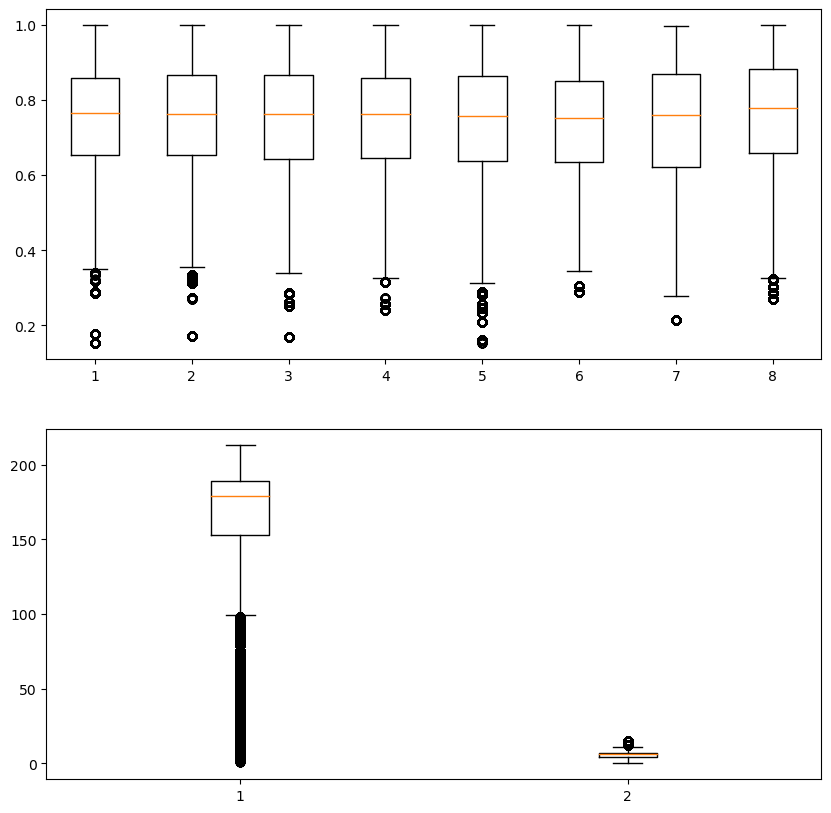

In [33]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
ax1.boxplot(X_train[outlier_feat])
ax2.boxplot(X_train[['Num Underrecorded Efficacy', 'Num Mismatched Events']])
plt.show()

In [34]:
# shows the outliers as non-NaN values
outliers = find_outliers_IQR(X_train[num_features])
outliers.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop outliers

In [38]:
# defines a function to drop the outliers from a given df
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = not_outliers.dropna()

   return outliers_dropped

In [39]:
dropped_outliers_df = drop_outliers_IQR(X_train[num_features])

In [40]:
dropped_outliers_df[]

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events
1,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181.0,3.0
2,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159.0,7.0
3,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178.0,6.0
4,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164.0,4.0
5,20,0.647,0.848,0.702,0.906,0.744,0.741,0.901,0.815,18,-2,0.819,0.659,0.755,163.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287788,26,0.605,0.665,0.740,0.649,0.713,0.750,0.681,0.596,61,35,0.563,0.449,0.655,180.0,4.0
287789,34,0.879,0.820,0.814,0.861,0.792,0.743,0.975,0.990,33,-1,0.973,0.986,0.530,123.0,8.0
287790,26,0.691,0.599,0.389,0.364,0.953,0.736,0.676,0.699,28,2,0.682,0.447,0.507,155.0,2.0
287791,34,0.879,0.820,0.814,0.861,0.792,0.743,0.975,0.990,33,-1,0.973,0.986,0.530,123.0,8.0


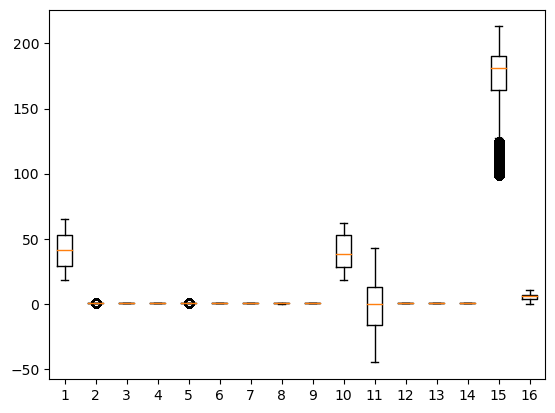

In [44]:
_ = plt.boxplot(dropped_outliers_df)
plt.show()

In [50]:
for col in num_features:
    print(col, len(find_outliers_IQR(dropped_outliers_df[col])))
    

sub_age 0
sub_health_h 1995
sub_commitment_h 0
sub_perceptiveness_h 0
sub_dexterity_h 579
sub_sociality_h 0
sub_goodness_h 0
sub_strength_h 0
sub_openmindedness_h 0
sup_age 0
sup_sub_age_diff 0
sup_commitment_h 0
sup_perceptiveness_h 0
sup_goodness_h 0
Num Underrecorded Efficacy 13417
Num Mismatched Events 0


### Update Train Set After Dropping Outliers

In [ ]:
X_train.drop(num_features)

## Preprocessing: Scale Numeric Features using Oversampled test set only

In [8]:
# instantiate scaler
scaler = StandardScaler()

# fit data
scaler.fit(X_train_over[num_features])

# transform data
X_train_over[num_features] = scaler.transform(X_train_over[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Check mean and std
print(X_train_over[num_features].mean())
print(X_train_over[num_features].std())

sub_age                       2.669888e-16
sub_health_h                  9.478694e-16
sub_commitment_h             -6.173436e-19
sub_perceptiveness_h         -4.602173e-16
sub_dexterity_h              -1.274469e-15
sub_sociality_h               6.905359e-16
sub_goodness_h                1.460092e-15
sub_strength_h                2.246266e-16
sub_openmindedness_h          1.851265e-15
sup_age                       3.034367e-16
sup_sub_age_diff             -4.938749e-18
sup_commitment_h              1.275383e-15
sup_perceptiveness_h          3.612324e-16
sup_goodness_h               -1.495651e-15
Num Underrecorded Efficacy   -1.161594e-16
Num Mismatched Events         9.166318e-17
dtype: float64
sub_age                       1.000001
sub_health_h                  1.000001
sub_commitment_h              1.000001
sub_perceptiveness_h          1.000001
sub_dexterity_h               1.000001
sub_sociality_h               1.000001
sub_goodness_h                1.000001
sub_strength_h          

In [9]:
X_train_over.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,-0.991407,-0.033211,1.186856,0.878234,1.172269,-1.626523,0.767297,0.408115,1.492621,1.131796,1.654639,-0.616180,-0.253317,0.015333,-0.302391,-0.864590,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,-0.920709,1.059116,-1.079997,0.238869,0.213271,-1.593703,0.291329,-0.139609,0.985601,0.059901,0.768069,-0.292387,1.606222,0.306850,1.054256,-0.238307,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,1.058832,0.512953,-0.019910,0.667310,1.512783,-0.727248,0.272541,-1.114048,0.923769,-1.011994,-1.614589,-0.259347,-1.956446,-1.413671,0.752779,1.014259,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1.412321,0.121873,0.080098,0.225686,0.303611,-1.285192,-1.105259,0.987683,0.416749,-1.297832,-2.113285,0.982960,0.372323,0.501195,1.013145,0.701118,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,1.412321,0.560152,-0.686632,-0.407087,0.178524,0.480539,0.579415,0.019613,-0.591108,-0.869074,-1.780821,0.262686,-1.319221,0.661243,0.821296,0.074835,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


# Logistic Regression Model

### Baseline model

In [10]:
# instantiate model
lr = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr.fit(X_train_over, y_train_over.values.ravel())

# Predict test values
y_pred_test = lr.predict(X_test)

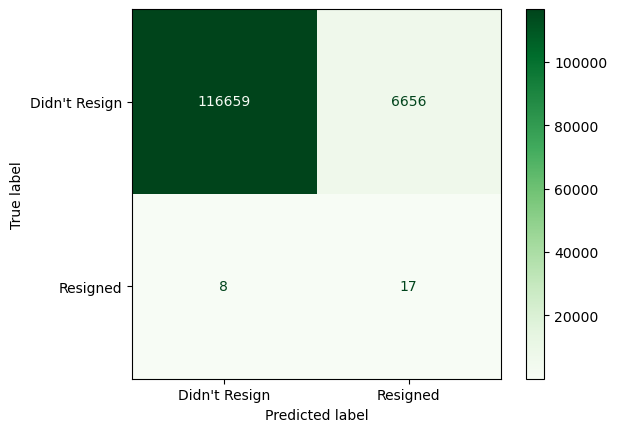

In [11]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

There were no true positives predicted

In [12]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9459704880817253
Area Under Curve: 0.8130122045168877
Confusion Matrix: 
[[116659   6656]
 [     8     17]]
Recall score: 0.68


The metrics for the baseline model indicate that the model's performance is very poor even though there is a high accuracy score. The recall score is zero which means that there were no employees correctly classified as a resignation. Lastly, the AUC score of 0.49 indicates that the model performs no better than random guessing. 

### Visualize ROC-AUC plot

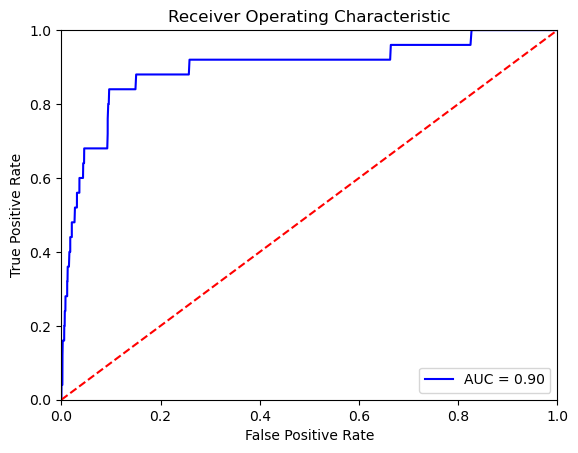

In [13]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Acccounting for Imbalanced Data: Weighted Logistic Regression

In [8]:
# specify weight proportional to class imbalance
w = {0:2, 1:98}

# instantiate model with specified weight params
weighted_lr = LogisticRegression(solver = 'liblinear', max_iter = 500, class_weight=w)

# fit model to training data
weighted_lr.fit(X_train, y_train.values.ravel())

# predict values
y_pred = weighted_lr.predict(X_test)

In [9]:
# Check metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.927007299270073
Area Under Curve: 0.5772727272727273
Confusion Matrix: 
[[126   6]
 [  4   1]]
Recall score: 0.2


After adding the `class_weight` attribute, there is marginal improvement in the AUC score

### Find Best Weights with GridSearchCV

In [10]:
# define grid of weights
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

params = {'class_weight': w}

# define model
lr3 = LogisticRegression(max_iter=500, random_state=13)

# define Grid SearchCV
grid = GridSearchCV(lr3, params, scoring="roc_auc", n_jobs=-1, refit=True)

# fit CV
grid.fit(X_train, y_train.values.ravel())

# get best score and params
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9057545863620631 with param: {'class_weight': {0: 0.001, 1: 1.0}}


### Check model with best weights

In [11]:
# define weights
w = {0: 0.001, 1: 1}

# define model
lr4 = LogisticRegression(class_weight=w, random_state=13)

# fit it
lr4.fit(X_train, y_train.values.ravel())

# test
y_pred = lr4.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.10948905109489052
Confusion Matrix: 
[[ 10 122]
 [  0   5]]
Area Under Curve: 0.5378787878787878
Recall score: 1.0


Using the best params from the grid search of `class_weight` alone, the accuracy dramatically decreased, and so did the AUC score. 

### LogReg Hyperparam tuning: `class_weight`, `penalty`, `C`, and `solver` 

In [ ]:
# w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
#      {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
#      {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
#      {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
#      {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
#      {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
#      {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
#      {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
#      {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
#      {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"penalty": ["l1", "l2"]
                   ,"C": crange,
                   "solver":['liblinear', 'newton-cholesky']
                  }

# logistic model classifier
lg4 = LogisticRegression(random_state=13, max_iter=500)

# define evaluation procedure
grid = GridSearchCV(lg4, hyperparam_grid, scoring="roc_auc", n_jobs=-1, refit=True)

grid.fit(X_train_over, y_train_over.values.ravel())

print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

### LogReg Model with Optimized Params

In [13]:
lg5 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.5, class_weight={0: 0.01, 1: 10}, random_state=13, max_iter=500,)

lg5.fit(X_train, y_train.values.ravel())

y_pred = lg5.predict(X_test)

lg5_score = roc_auc_score(y_test, y_pred)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('Area Under Curve: ', lg5_score)
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.6934306569343066
Confusion Matrix: 
[[90 42]
 [ 0  5]]
Area Under Curve:  0.8409090909090909
Recall score: 1.0


After some hyperparameter tuning, we're left with a significantly improved AUC score however at the expense of a marked drop in accuracy.

In [14]:
# Keep track of models and best scores
model_scores = {'LogReg':round(lg5_score,2)}

# Weighted-SVM for Imbalanced Data

In [15]:
# instantiate model & specify class weights: general rule of thumb is the inverse of the class distribution
weights = {0:0.02, 1:0.98}
weighted_svm = SVC(gamma='scale', class_weight=weights, random_state=123)

# Fit and predict
weighted_svm.fit(X_train, y_train.values.ravel())

y_pred = weighted_svm.predict(X_test)

# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8613138686131386
Area Under Curve: 0.8318181818181819
Confusion Matrix: 
[[114  18]
 [  1   4]]
Recall score: 0.8


A weighted-SVM already performed better for Accuracy and AUC almost right out-of-the-box. Perhaps, after some hyperparam tuning, the results can be improved.

### Weighted-SVM with GridSearchCV for Hyperparameter Tuning

In [16]:
# define weights and params
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
param_grid = {'class_weight': w}
svm = SVC(random_state=123)

# Specify cross-validation generator, in this case (10 repeats x 5CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')

# Fit and predict
grid_result = grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)

# report the best configuration
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.874419 using {'class_weight': {0: 0.01, 1: 1.0}}


### Check SVM with best `class_weight` param from GridSearch

In [17]:
# instantiate model & specify class weights: general rule of thumb is the inverse of the class distribution
weights = {0:0.01, 1:1.0}
weighted_svm = SVC(gamma='scale', class_weight=weights, random_state=123)

# Fit and predict
weighted_svm.fit(X_train, y_train.values.ravel())

y_pred = weighted_svm.predict(X_test)

# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.10948905109489052
Area Under Curve: 0.5378787878787878
Confusion Matrix: 
[[ 10 122]
 [  0   5]]
Recall score: 1.0


The class weight from the GridSearch yielded a score even worse than the previous model with `class_weights` of an inverse of the class distributions. 

### Check SVM with best `class_weights` so far and Hyperparam Tuning of `C`, `kernel` and `gamma`

In [18]:
w = {0:0.02, 1:0.98}
crange = np.arange(0.5, 20.0, 0.5)
params = {'C': crange,
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma':['scale', 'auto']
         }
svm = SVC(class_weight=w, random_state=123)

# Specify cross-validation generator, in this case (10 repeats x 5CV)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
grid = GridSearchCV(estimator=svm, param_grid=params, cv=cv, n_jobs=-1, scoring='roc_auc')

# Fit and predict
grid_result = grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)

# report the best configuration
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.907853 using {'C': 2.0, 'gamma': 'scale', 'kernel': 'sigmoid'}


### Check SVM with best params from tuning

In [19]:
w = {0:0.02, 1:0.98}

svm = SVC(class_weight=w, random_state=123, C=0.5, gamma='scale', kernel='sigmoid')

# Fit and predict
svm.fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)

# save auc score 
svm_score = roc_auc_score(y_test, y_pred)

# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print('Area Under Curve:', svm_score)
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7591240875912408
Area Under Curve: 0.875
Confusion Matrix: 
[[99 33]
 [ 0  5]]
Recall score: 1.0


After some hyperparam tuning, the AUC score was improved although at the expense of the accuracy. So far, this score is better than the weighted Logistic Regression model.

In [20]:
# add scores to model_score dict
model_scores['svm'] = round(svm_score, 2)

# Xtreme Gradient Boosting Model

### Baseline XGBoost Model

In [21]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }   

In [22]:
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [23]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9635036496350365
Area Under Curve: 0.5
Confusion Matrix: 
[[132   0]
 [  5   0]]
Recall score: 0.0


### Weighted XGBoost for Class Imbalance

In [24]:
# declare parameters and estimate the value for `scale_pos_weight` with inverse of class distribution
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'scale_pos_weight': 98,
        } 
model = XGBClassifier(**params)

# fit the classifier to the training data
model.fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

In [25]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9343065693430657
Area Under Curve: 0.581060606060606
Confusion Matrix: 
[[127   5]
 [  4   1]]
Recall score: 0.2


Slight improvement in scores.

### GridSearchCV for best weight

In [26]:
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

# define model
boost = XGBClassifier()

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=boost, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

# Fit and predict
grid_result = grid.fit(X_train, y_train.values.ravel())

In [27]:
# report the best configuration
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: 0.814850 using {'scale_pos_weight': 10}


### Check XGBoost Model with best weight param

In [28]:
# declare parameters and estimate the value for `scale_pos_weight` witt param with best score from GridSearchCV
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'scale_pos_weight': 10,
            'eval_metric': 'auc'
        } 
model = XGBClassifier(**params)

# fit the classifier to the training data
model.fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

In [29]:
xgb_score = roc_auc_score(y_test, y_pred)

In [30]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print('Area Under Curve: ', xgb_score)
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9562043795620438
Area Under Curve:  0.4962121212121212
Confusion Matrix: 
[[131   1]
 [  5   0]]
Recall score: 0.0


In [31]:
model_scores['xgb'] = xgb_score

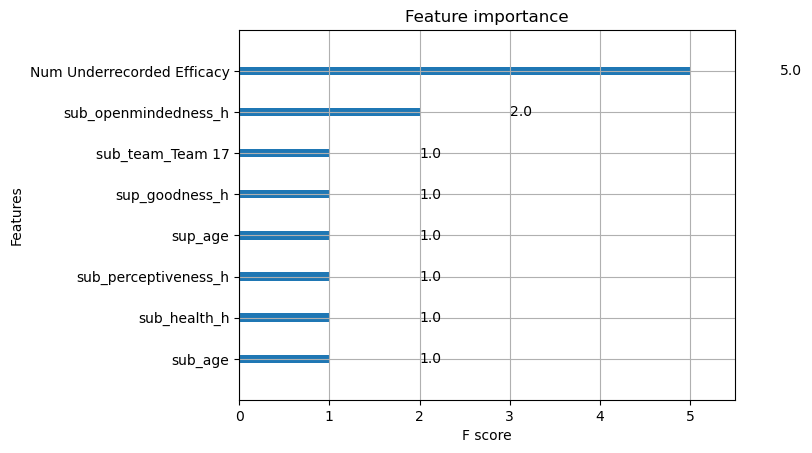

<Figure size 1600x1200 with 0 Axes>

In [32]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [33]:
models = pd.DataFrame.from_dict(model_scores, orient='index', columns=['AUC score'])
models

,AUC score
LogReg,0.840000
svm,0.880000
xgb,0.496212


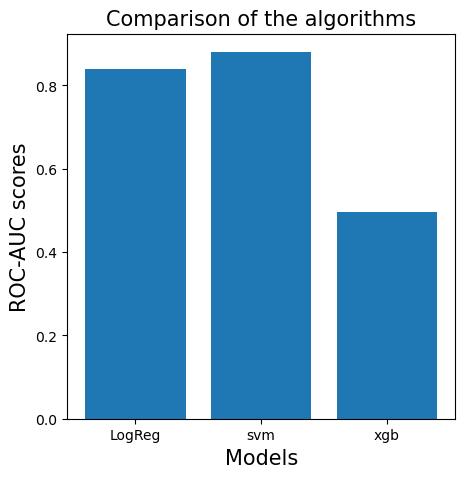

In [34]:

plt.figure(figsize=(5,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_ = plt.bar(models.index, models['AUC score'])
plt.show()

After some initial modeling, between a Logistic Regression, SVM and XGBoost model, the weighted-SVM model seems to be the leading one when scored on AUC-ROC score. 